<a href="https://colab.research.google.com/github/dxdt14/Pytorch-CNN-MNIST-data-/blob/main/Pytorch_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math, numpy as np, pandas as pd, torch.nn.functional as F
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torch
dev = torch.device("cuda" if torch.cuda.is_available() else torch.device("cpu"))

In [ ]:
print(torch.cuda.is_available())

True


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(256, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)
    def forward(self, x):
        x = x.view(-1, 1, 28, 28).to(dev)
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x.view(-1, x.size(1))

In [ ]:
lr = 0.1
epochs=5
model = CNN()
model.to(dev)
opt = optim.SGD(model.parameters(), lr=lr)
loss_func = nn.CrossEntropyLoss()

In [ ]:
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)
train_dl = DataLoader(train_data, batch_size=64)
test_dl = DataLoader(test_data, batch_size=64)

100%|██████████| 9912422/9912422 [00:00<00:00, 110978950.38it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 105061312.94it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 104569173.03it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 9953254.32it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
for epoch in range(epochs):
    model.train()
    for x,y in train_dl:
        x = x.to(dev)
        y = y.to(dev)
        pred = model(x)
        loss = loss_func(pred,y)

        loss.backward()
        opt.step()
        opt.zero_grad()
    model.eval()
    with torch.no_grad():
        valid_loss = sum(loss_func(model(x.to(dev)),y.to(dev)) for x,y in test_dl)
    print(epoch, valid_loss/len(test_dl))

0 tensor(0.1377, device='cuda:0')
1 tensor(0.0895, device='cuda:0')
2 tensor(0.0871, device='cuda:0')
3 tensor(0.0738, device='cuda:0')
4 tensor(0.0721, device='cuda:0')


In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
examples = enumerate(test_dl)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

torch.Size([64, 1, 28, 28])

In [ ]:
with torch.no_grad():
  output = model(example_data)

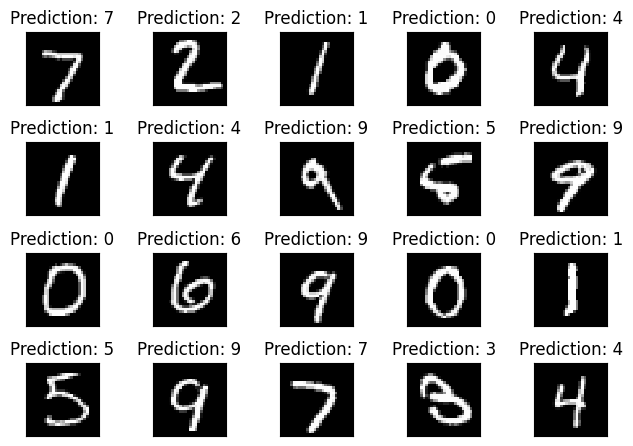

In [ ]:
fig = plt.figure()
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])